## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

## Load the dataset

In [3]:
data=pd.read_csv("C:\\Users\mounika\OneDrive\Desktop\insurance.csv")

In [4]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
data.shape

(1338, 7)

In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Missing values

In [9]:
data.isnull().sum().values.sum()

0

Unique values

In [11]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
#changing object dtype to category  to save memory
data.sex=data['sex'].astype("category")
data.smoker=data['smoker'].astype("category")
data.region=data['region'].astype("category")

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [16]:
data.describe(include='category')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [18]:
list_col = data.select_dtypes(['category']).columns
_ = [print(data[col].value_counts()) for col in list_col]


sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64


There are slightly more men in the sample than women, with 676 men and 662 women.
There are more nonsmokers in the sample (1064 nonsmokers compared to 274 smokers).
When compared to other regions, the southwest region has a higher number of customer claims.

## Exploratory Data Analysis

Univariate Analysis

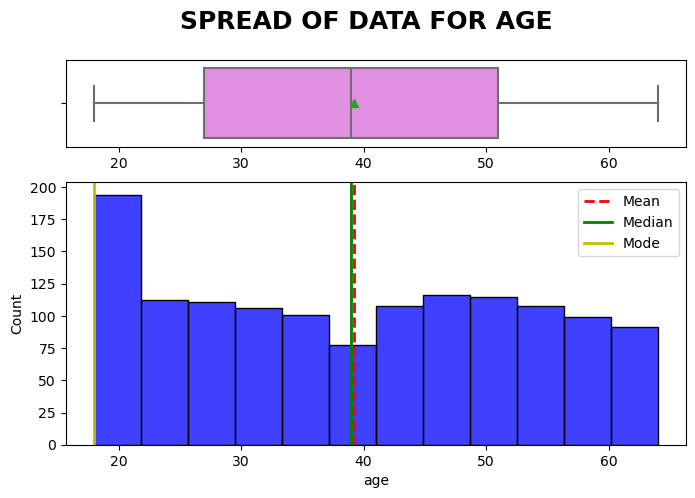

In [22]:
def dist_box(data):
    name = data.name.upper()
    fig, (ax_box, ax_dis) = plt.subplots(2, 1, gridspec_kw={"height_ratios": (.25, .75)}, figsize=(8, 5))
    fig.suptitle(f"SPREAD OF DATA FOR {name}", fontsize=18, fontweight='bold')

    sns.boxplot(x=data, showmeans=True, orient='h', color="violet", ax=ax_box).set(xlabel='')

    sns.histplot(data, kde=False, color='blue', ax=ax_dis)
    for line, linestyle, color in zip([data.mean(), data.median(), data.mode().tolist()[0]],
                                     ['--', '-', '-'],
                                     ['r', 'g', 'y']):
        ax_dis.axvline(line, linestyle=linestyle, color=color, linewidth=2)

    ax_dis.legend({'Mean': data.mean(), 'Median': data.median(), 'Mode': data.mode().tolist()[0]})

# Example usage:
# Replace 'data['your_column_name']' with the actual column you want to analyze
dist_box(data['age'])
plt.show()


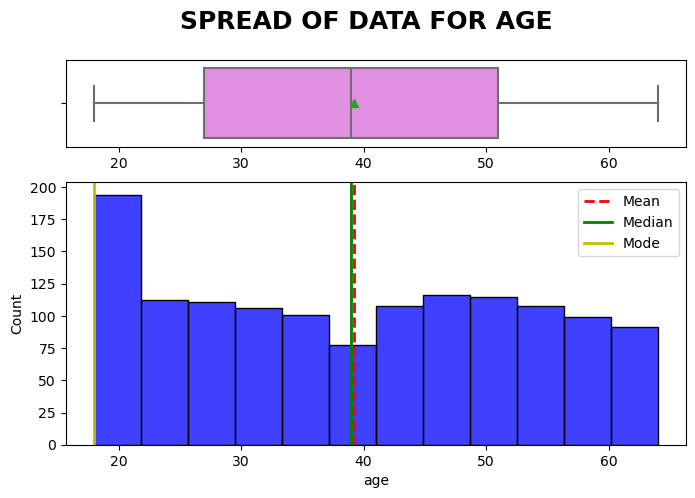

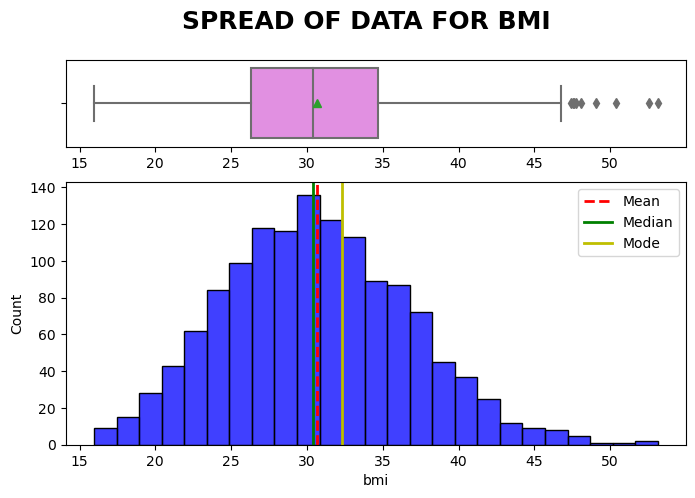

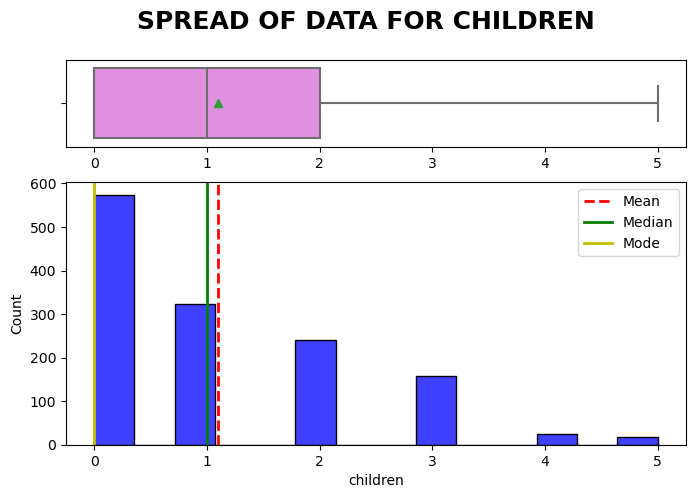

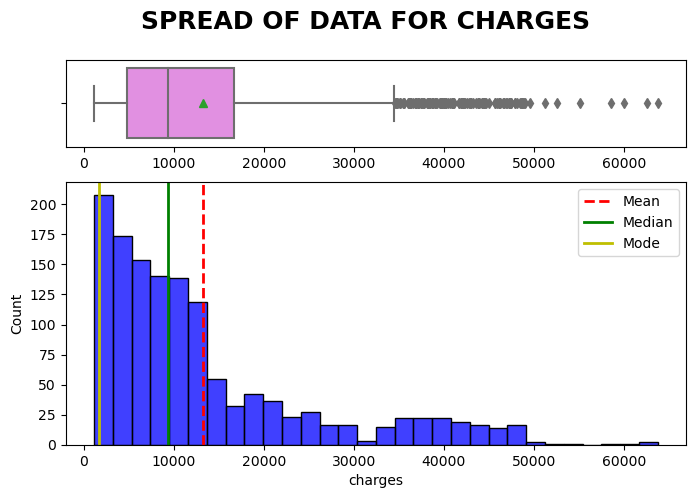

In [25]:
#select all quantitative columns for checking the spread
list_col=  data.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    dist_box(data[list_col[i]])
    

->The major beneficary's age ranges roughly from 20 to 65. The average age is about forty. The majority of clients are in their 18s and 20s.
->BMI distribution is standard, with the average beneficiary's BMI being 30.This BMI falls outside of the typical BMI range. The higher end has a large number of outliers.
->The majority of beneficiaries are childless.
->The distribution of charges is right-skewed and unimodal.The biggest charge to the insurance is 63770, with an average cost of approximately 130000.At the upper end, there are a lot of outliers.

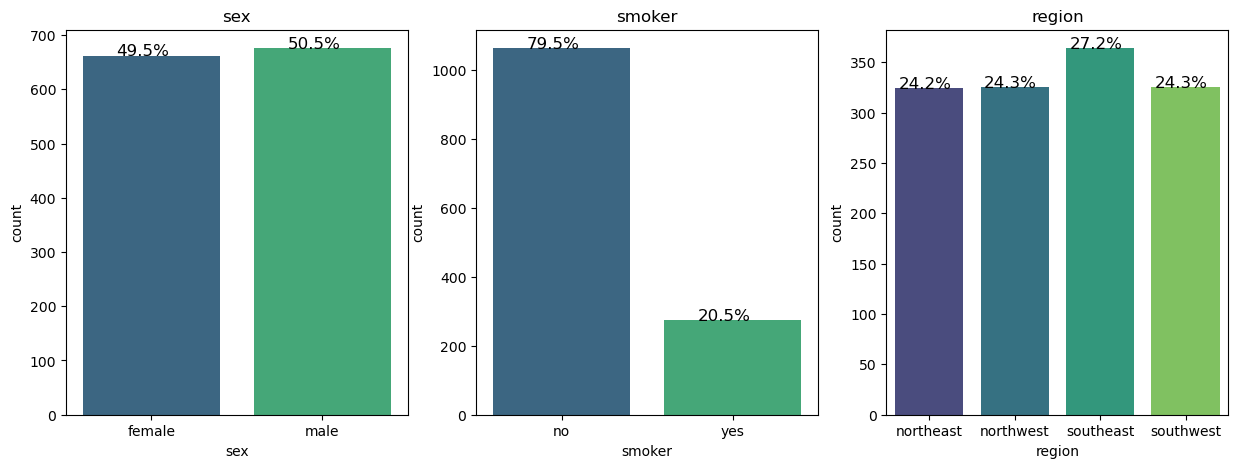

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
def bar_perc(data, features):
    fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(15, 5))

    for i, feature in enumerate(features):
        total = len(data[feature])
        ax = sns.countplot(x=feature, data=data, palette="viridis", ax=axes[i])

        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width() / 2 - 0.05
            y = p.get_y() + p.get_height()
            ax.annotate(percentage, (x, y), size=12, color='black', ha='center')

        ax.set_title(feature)

    plt.show()

# Example usage:
# Replace 'data' with your actual DataFrame
# Replace ['sex', 'smoker', 'region'] with the actual column names you want to analyze
bar_perc(data, ['sex', 'smoker', 'region'])


->Of the beneficiaries, 49.5% are women and 50.5% are men. There are roughly equal numbers of male and female beneficiaries.
->Twenty.5% of beneficiaries smoke.
->Benefits are dispersed equally among the regions, with the South East having the highest population (~27%) and the remaining regions having roughly 24% each.
->The majority of beneficiaries are childless.

Bivariate & multivariate Analysis

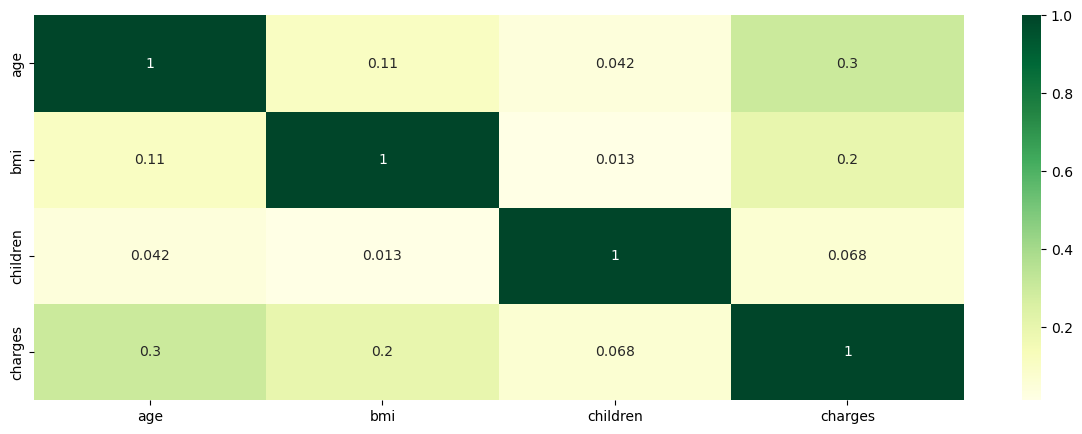

In [33]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 5))
corr_matrix = data[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGn")
plt.show()

In [35]:
cat_columns=data.select_dtypes(['category']).columns
cat_columns

Index(['sex', 'smoker', 'region'], dtype='object')

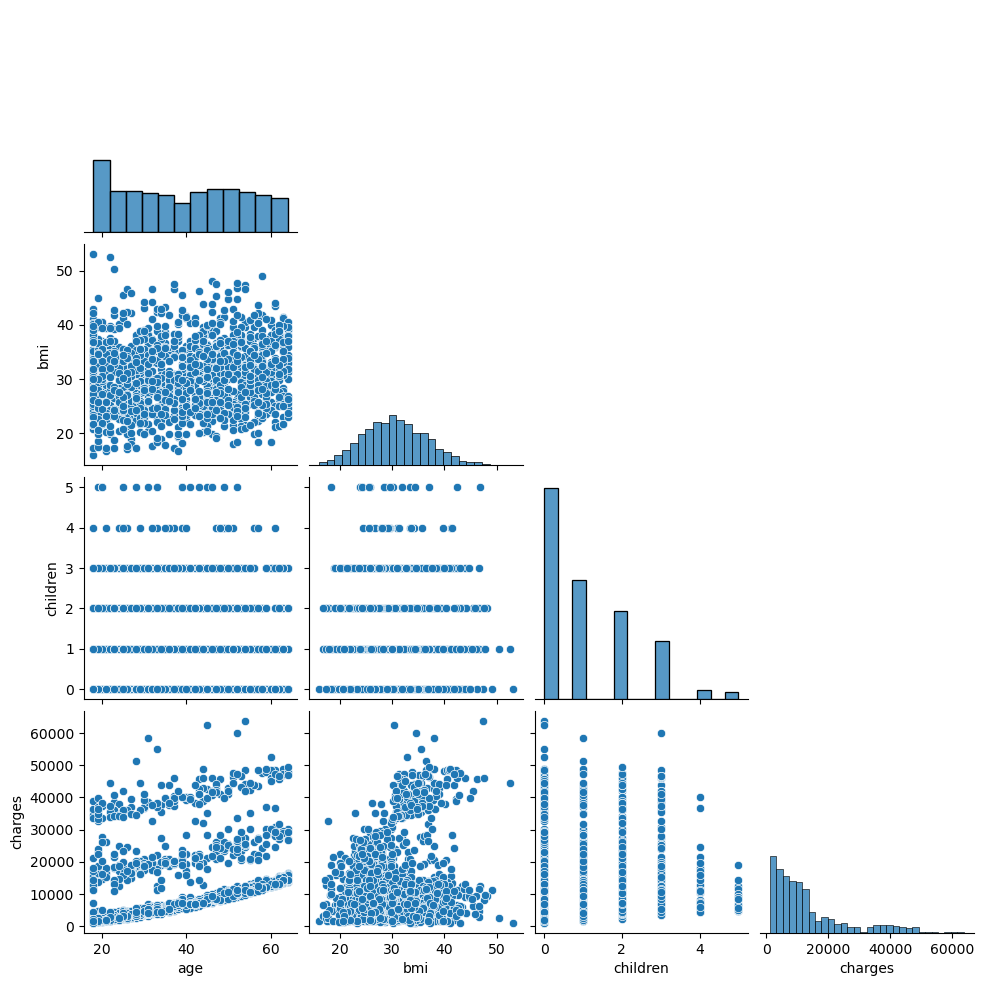

In [36]:
sns.pairplot(data=data , corner=True)
plt.show()

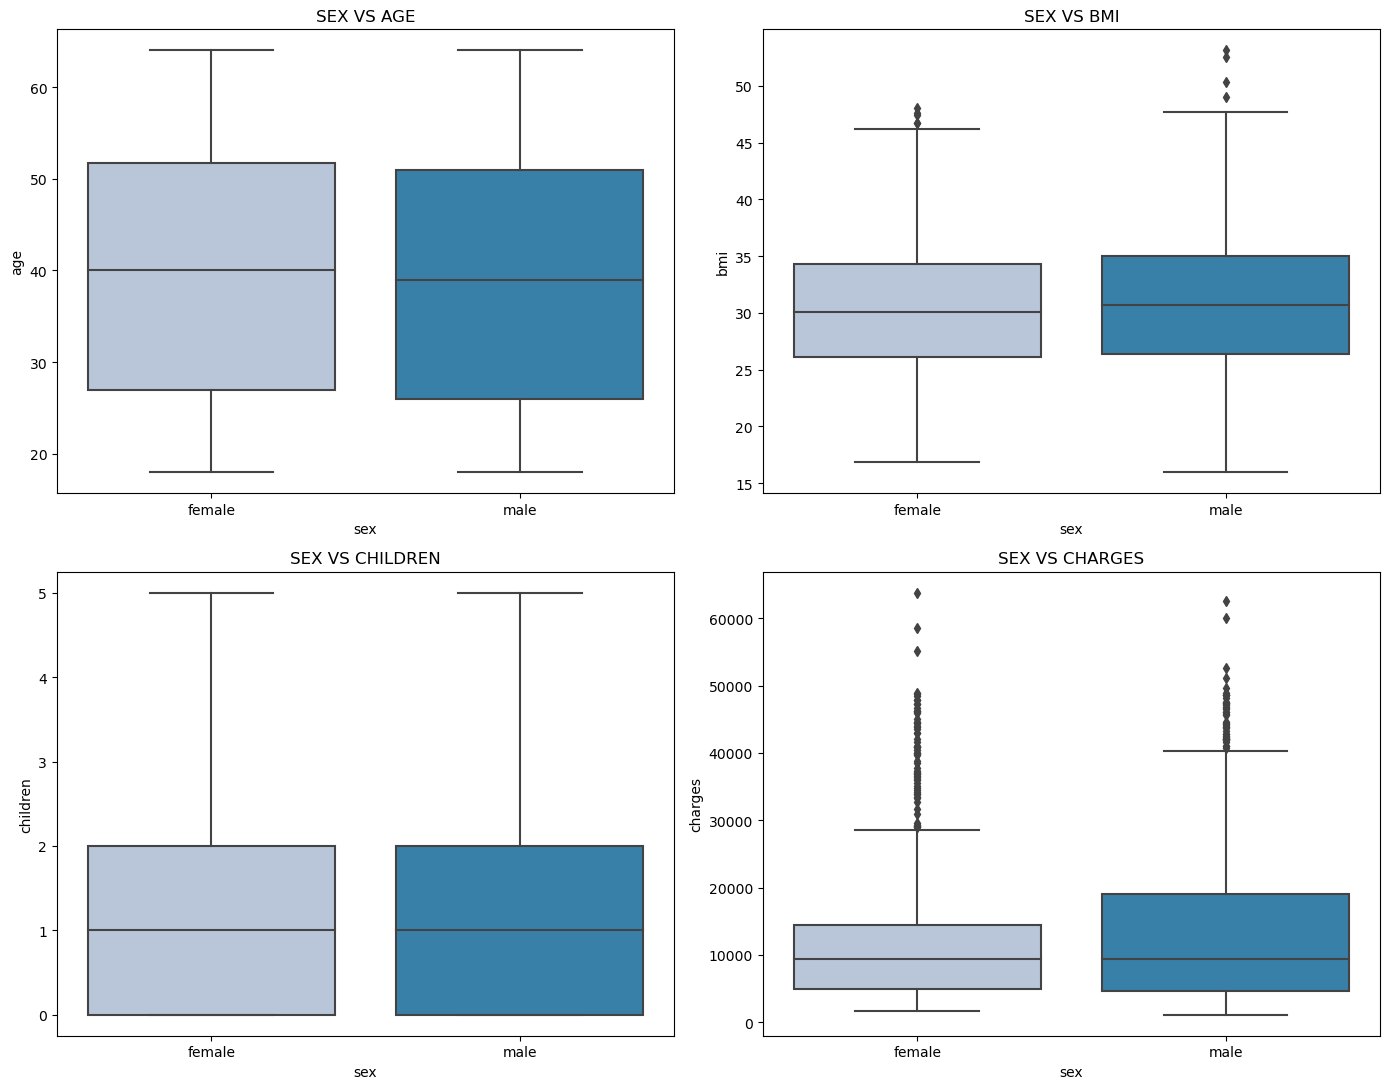

In [38]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(2, 2, figsize=(14, 11))
for i, col in enumerate(numeric_columns):
    sns.boxplot(x='sex', y=col, data=data, ax=axes[i // 2, i % 2], palette="PuBu")
    axes[i // 2, i % 2].set_title(f'SEX VS {col.upper()}')
plt.tight_layout()
plt.show()

->The mean age of female beneficiaries is somewhat greater than that of male beneficiaries.
->The number of beneficiaries, both male and female, who have the same BMI of There are a lot of male policyholder outliers, and their average
->BMI is marginally higher than that of women.
->In comparison to female policy holders, male policy holders have incurred higher insurance costs. Among female policyholders, there are many anomalies.

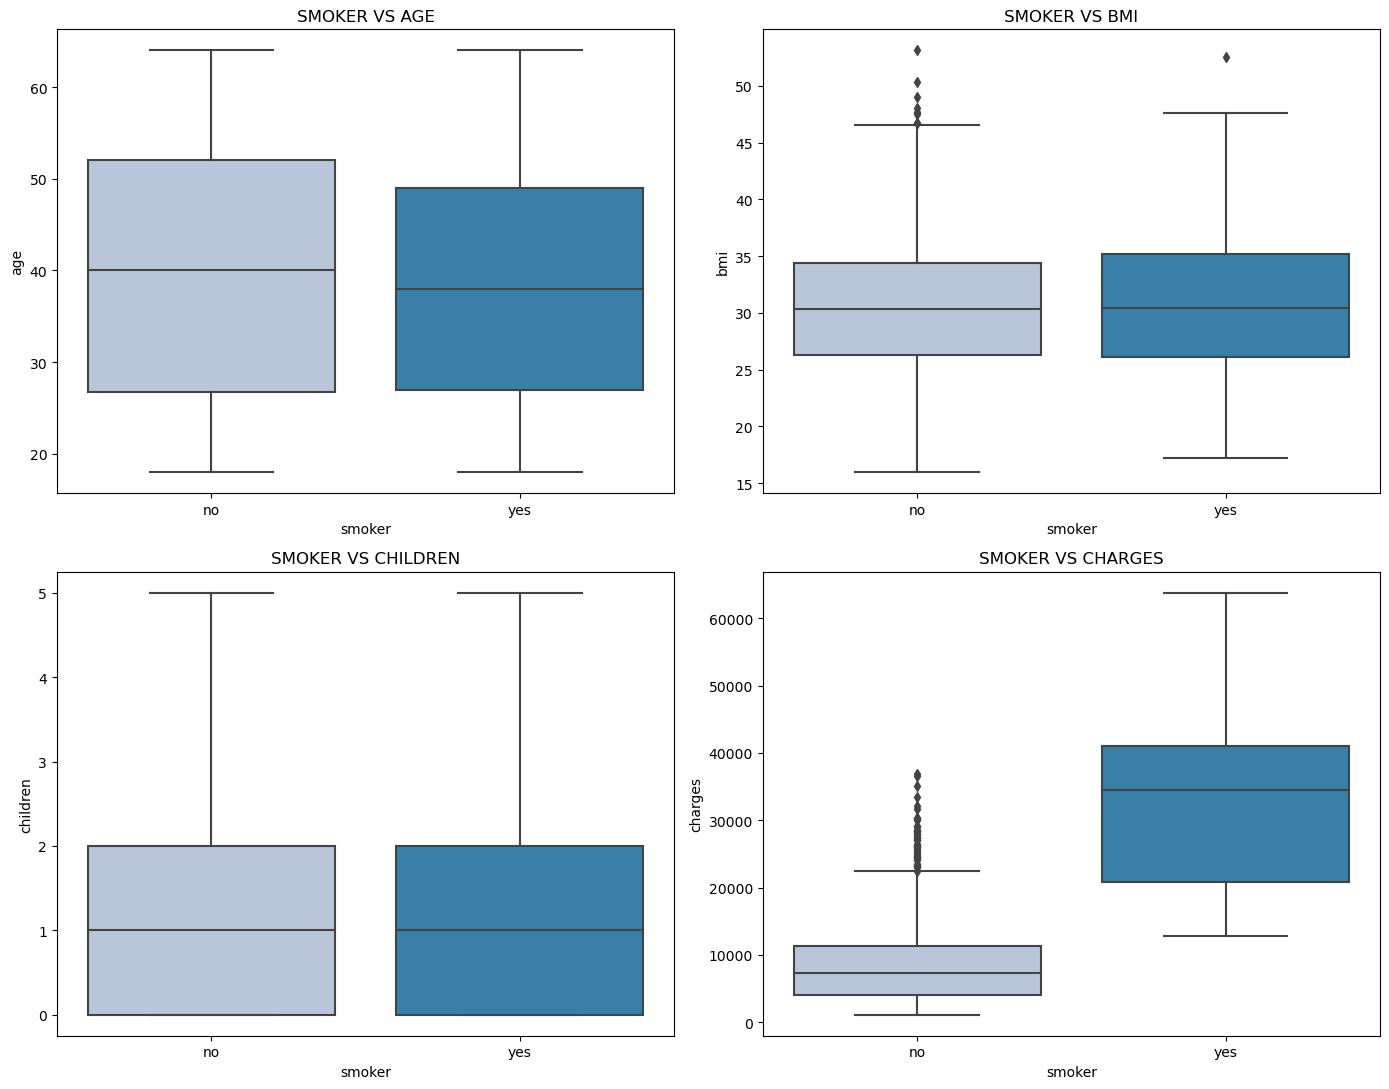

In [39]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(2, 2, figsize=(14, 11))
for i, col in enumerate(numeric_columns):
    sns.boxplot(x='smoker', y=col, data=data, ax=axes[i // 2, i % 2], palette="PuBu")
    axes[i // 2, i % 2].set_title(f'SMOKER VS {col.upper()}')
plt.tight_layout()
plt.show()

->Smoker have incured more cost to insurance than nonsmoker. There are outliers in nonsmoker , need to analyze.
->BMI of non smoker has lot of outliers.

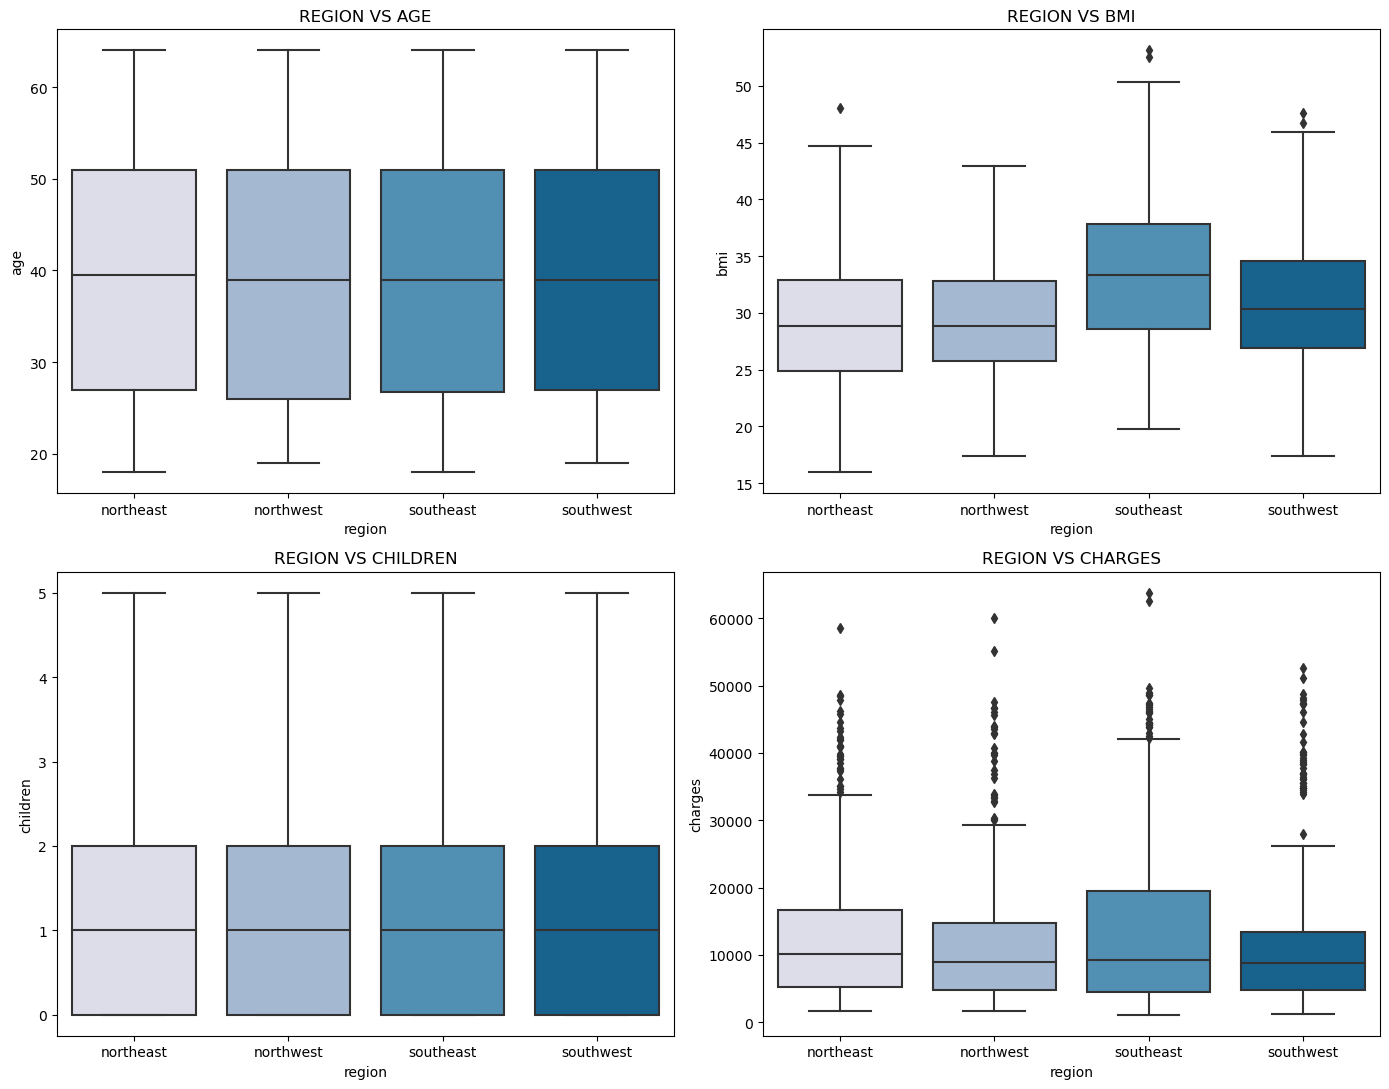

In [40]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(2, 2, figsize=(14, 11))
for i, col in enumerate(numeric_columns):
    sns.boxplot(x='region', y=col, data=data, ax=axes[i // 2, i % 2], palette="PuBu")
    axes[i // 2, i % 2].set_title(f'REGION VS {col.upper()}')
plt.tight_layout()
plt.show()

->Age and numnber of children across regions is almost same.
->Average Bmi of policy holder from southeast higher compared to other regions
->Charges incured because of policy holder from southeast is higher compared to othe regions
->There are lot of outliers on upper end in charges

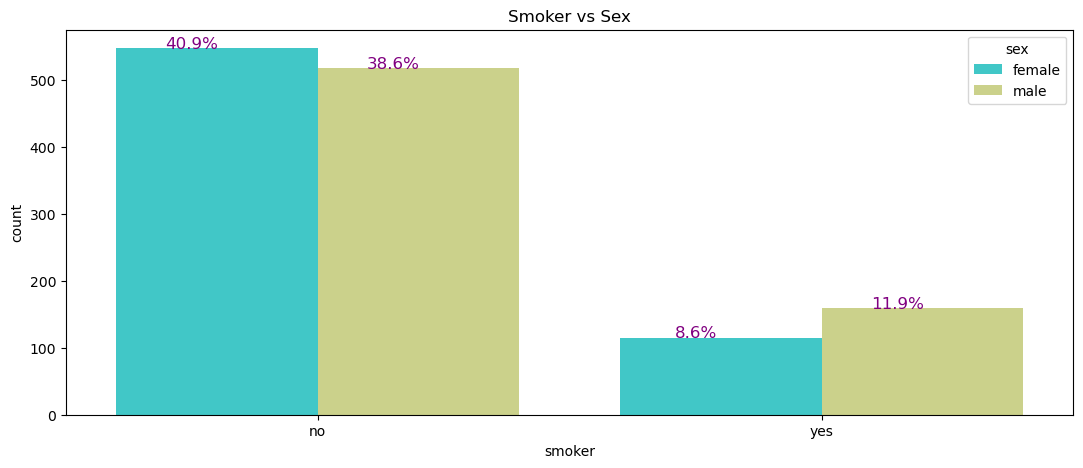

In [43]:
plt.figure(figsize=(13, 5))
ax = sns.countplot(x='smoker', hue='sex', data=data, palette='rainbow')
total = len(data['sex'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12, color='purple', ha='center')
ax.set(title="Smoker vs Sex")
plt.show()

[Text(0.5, 1.0, 'Smoker vs Charges')]

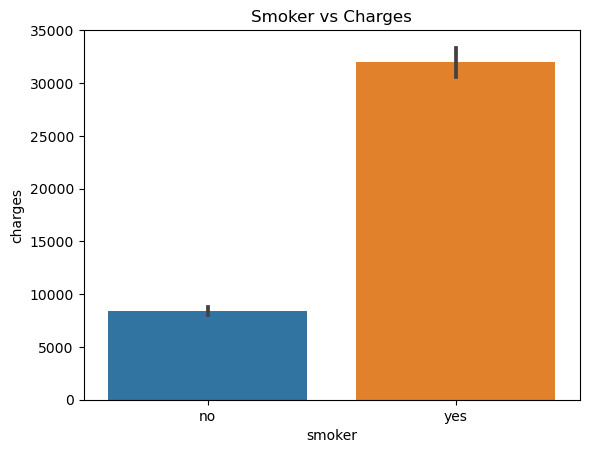

In [45]:
#smoker vs charges
sns.barplot(x=data.smoker,y=data.charges).set(title="Smoker vs Charges")

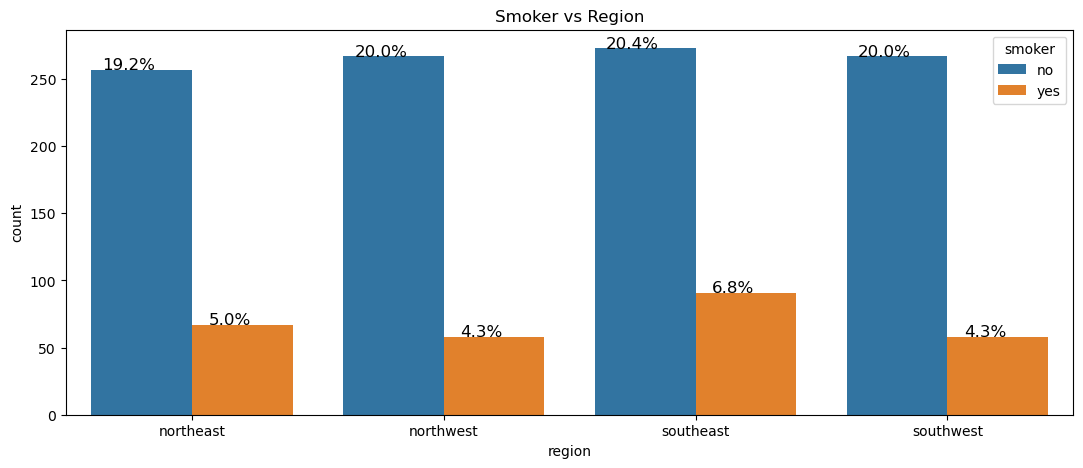

In [47]:
plt.figure(figsize=(13, 5))
ax = sns.countplot(x='region', hue='smoker', data=data)
total = len(data['smoker'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12, color='black', ha='center')
ax.set(title="Smoker vs Region")
plt.show()

->There are more male smokers than female.
->Southeast region has more smokers
->Smoker have more costlier claims than nonsmoker.

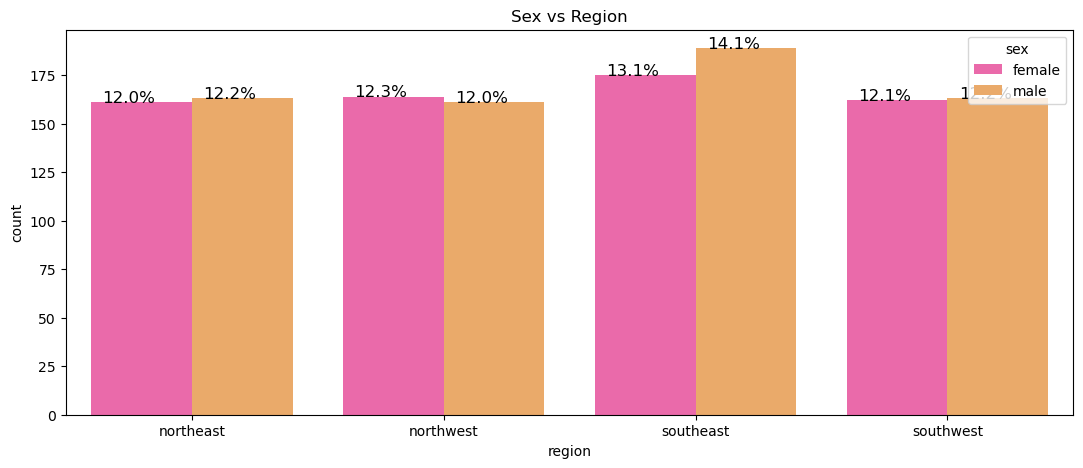

In [50]:
plt.figure(figsize=(13, 5))
ax = sns.countplot(x='region', hue='sex', data=data, palette='spring')
total = len(data['sex'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12, color='black', ha='center')
ax.set(title="Sex vs Region")
plt.show()

when compared to another regions southest has more number of smokers

In [53]:
data.groupby(data.sex).charges.mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

[Text(0.5, 1.0, 'Children vs Charges')]

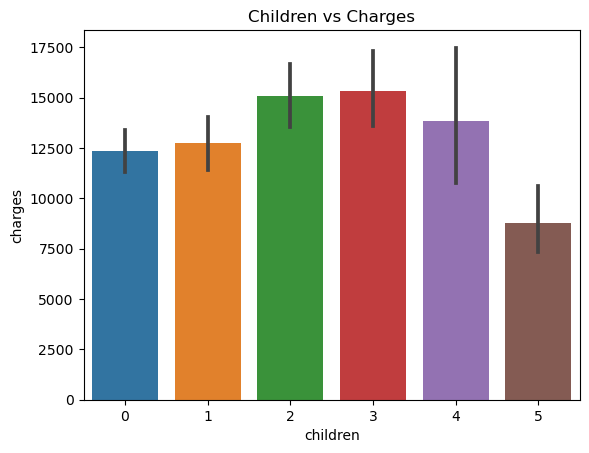

In [54]:
sns.barplot(x=data.children,y=data.charges).set(title="Children vs Charges")

[Text(0.5, 1.0, 'Sex Vs Charges')]

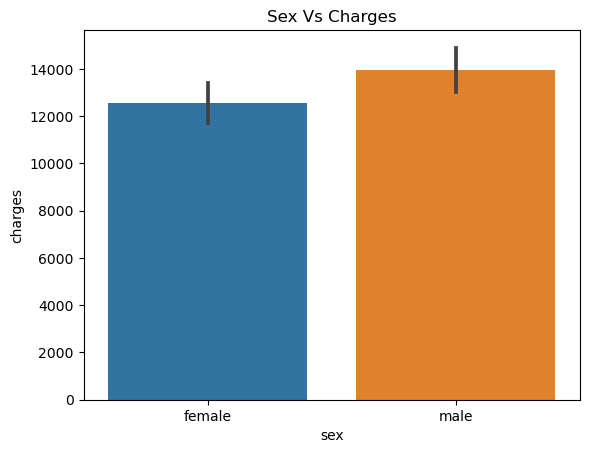

In [55]:
sns.barplot(x=data.sex,y=data.charges).set(title='Sex Vs Charges')

[Text(0.5, 1.0, 'Region Vs Charges')]

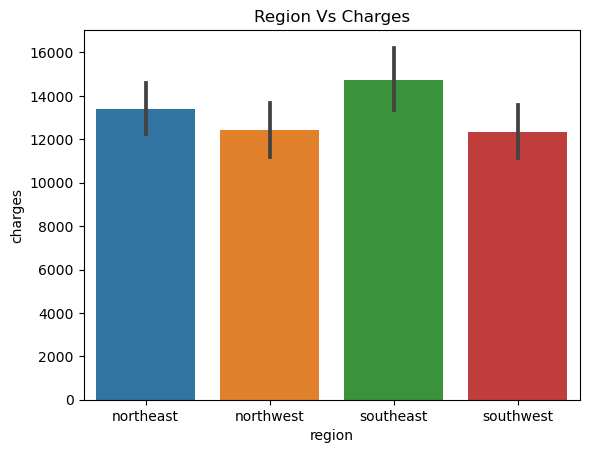

In [56]:
sns.barplot(x='region',y='charges',data=data).set(title='Region Vs Charges')

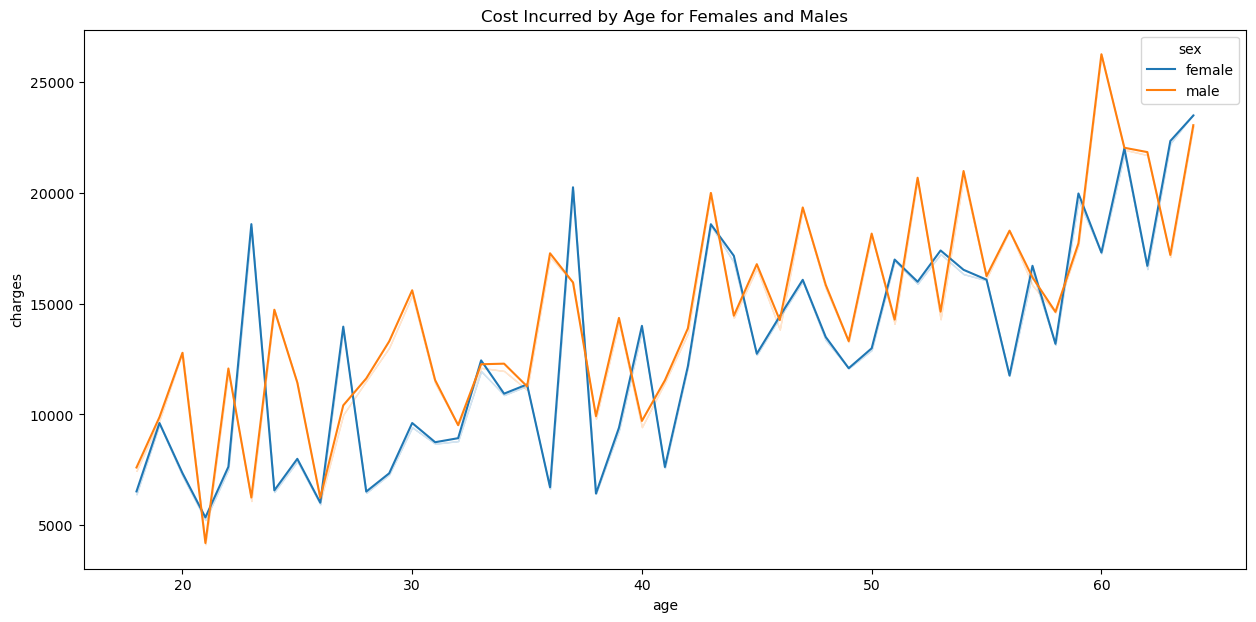

In [57]:
plt.figure(figsize=(15, 7))
sns.lineplot(x="age", y="charges", hue="sex", data=data, ci=0).set(title='Cost Incurred by Age for Females and Males')
plt.show()

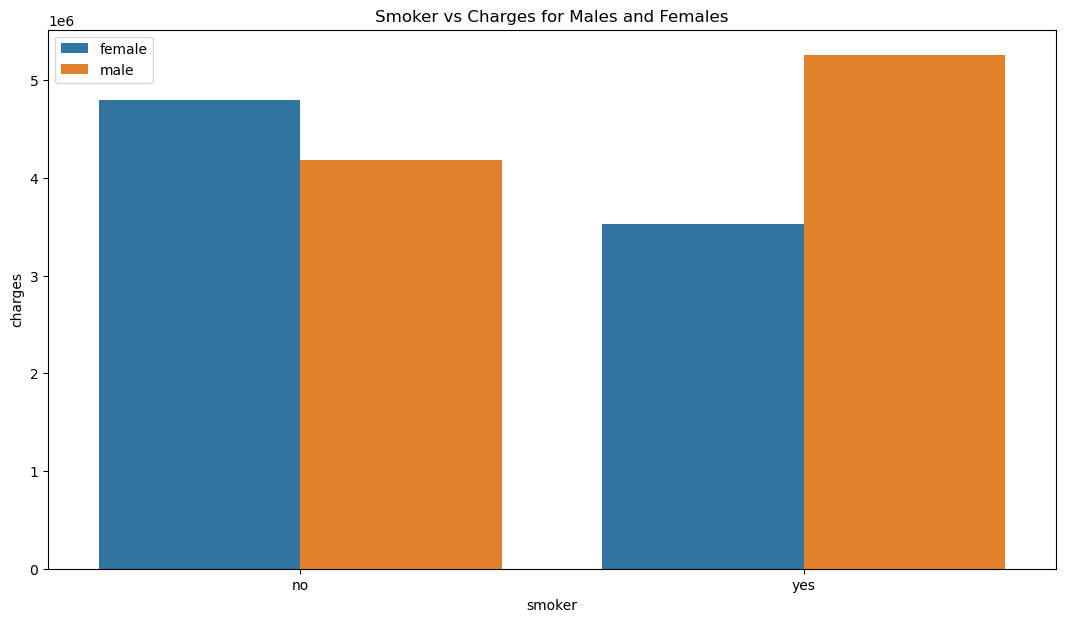

In [58]:
plt.figure(figsize=(13, 7))
sns.barplot(x='smoker', y='charges', hue='sex', data=data, estimator=sum, ci=None).set(title='Smoker vs Charges for Males and Females')
plt.legend(loc='upper left')
plt.show()

In [59]:
#creating groups of bmi
category=pd.cut(data.bmi,bins=[15,25,35,45,55],labels=['15-25','25-35','35-45','45-55'])
data.insert(5,'BMIGroup',category)

In [60]:
data.head()

,age,sex,bmi,children,smoker,BMIGroup,region,charges
0,19,female,27.900,0,yes,25-35,southwest,16884.92400
1,18,male,33.770,1,no,25-35,southeast,1725.55230
2,28,male,33.000,3,no,25-35,southeast,4449.46200
3,33,male,22.705,0,no,15-25,northwest,21984.47061
4,32,male,28.880,0,no,25-35,northwest,3866.85520


In [61]:
#no of children has no relation with charges
data.groupby(data.children).charges.mean()

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

In [62]:
data.groupby(data.BMIGroup).charges.mean()

BMIGroup
15-25    10284.290025
25-35    12720.254311
35-45    16913.681515
45-55    17547.926750
Name: charges, dtype: float64

In [63]:
data['AgeBin'] = pd.cut(data.age, bins=[18, 28, 38, 48, 58, 68], labels=['18-28', '28-38', '38-48', '48-58', '58-68'])


In [64]:
data.groupby(data.AgeBin).charges.mean()

AgeBin
18-28     9528.142786
28-38    11598.554943
38-48    14334.585843
48-58    15887.954341
58-68    20824.972901
Name: charges, dtype: float64

In [66]:
result = data.pivot_table(values='charges', index=['region', 'sex'], columns='smoker', aggfunc='mean')


In [67]:
result

smoker                     no           yes
region    sex                              
northeast female  9640.426984  28032.046398
          male    8664.042222  30926.252583
northwest female  8786.998679  29670.824946
          male    8320.689321  30713.181419
southeast female  8440.205552  33034.820716
          male    7609.003587  36029.839367
southwest female  8234.091260  31687.988430
          male    7778.905534  32598.862854

[Text(0.5, 1.0, 'Age Vs Charges')]

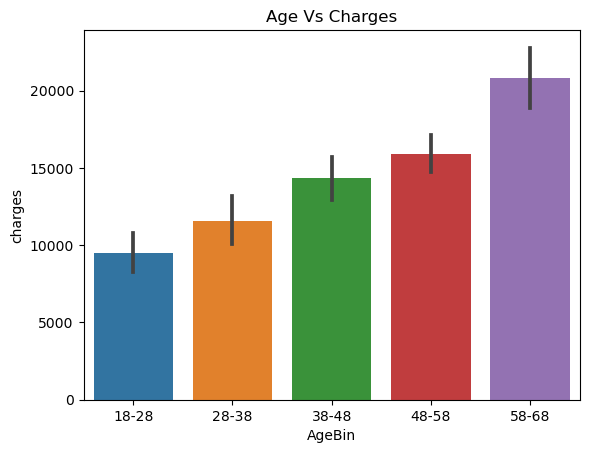

In [68]:
sns.barplot(x=data.AgeBin,y=data.charges).set(title='Age Vs Charges')

<Axes: xlabel='BMIGroup', ylabel='charges'>

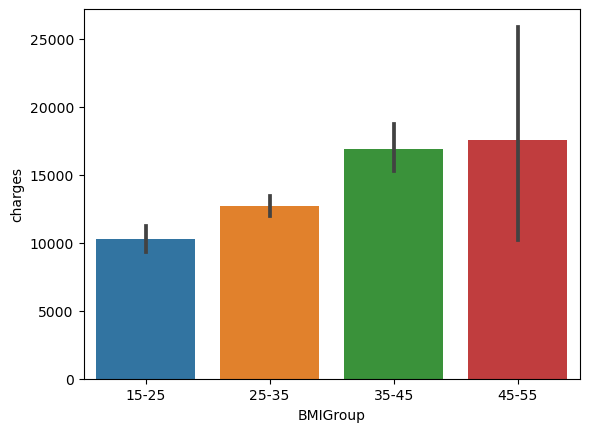

In [69]:
sns.barplot(x=data.BMIGroup,y=data.charges)

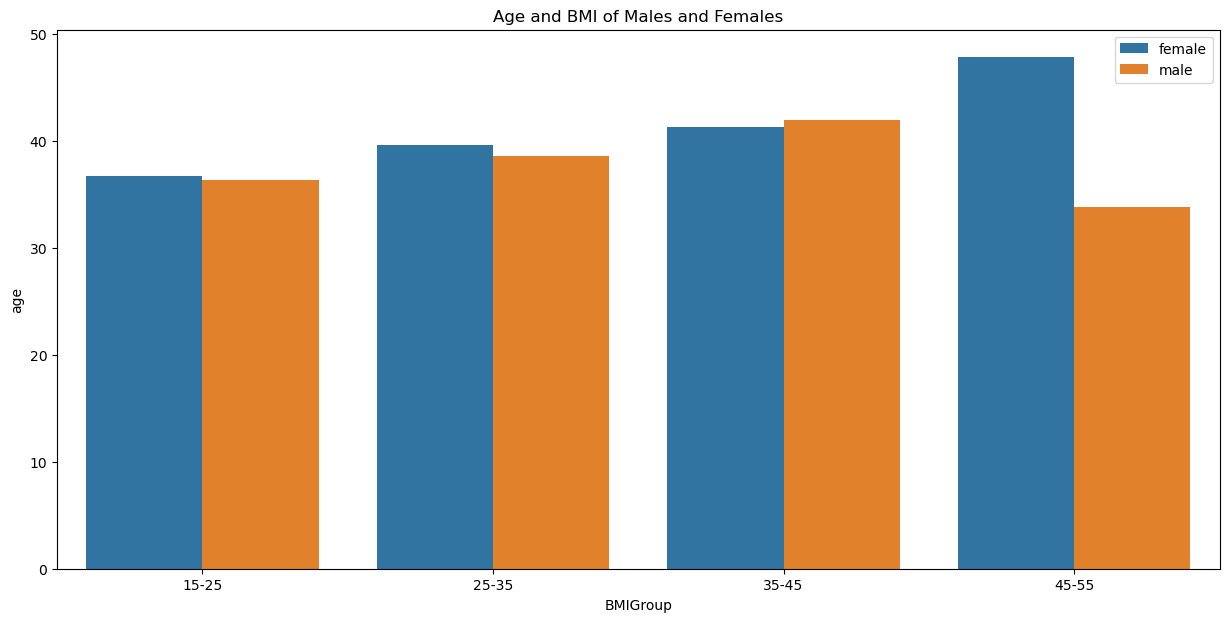

In [70]:
plt.figure(figsize=(15, 7))
sns.barplot(x='BMIGroup', y='age', hue='sex', data=data, ci=0).set(title='Age and BMI of Males and Females')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

[Text(0.5, 1.0, 'Fig 2:BMI group and Charges ')]

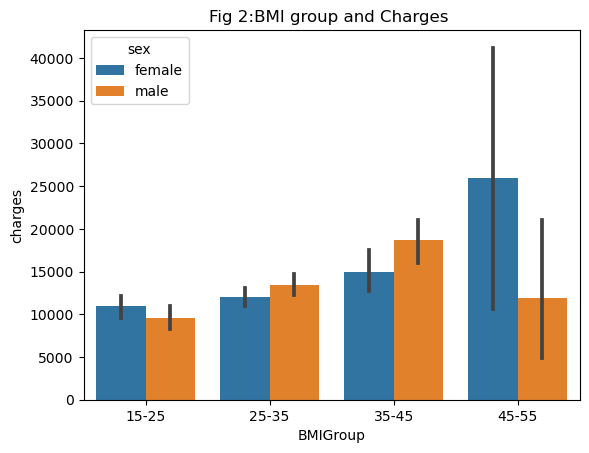

In [71]:
sns.barplot(x='BMIGroup',y='charges',hue='sex',data=data).set(title="Fig 2:BMI group and Charges " )

In [72]:
pd.crosstab(data['sex'],data['children'])

children,0,1,2,3,4,5
sex,,,,,,
female,289,158,119,77,11,8
male,285,166,121,80,14,10


<Figure size 2500x1000 with 0 Axes>

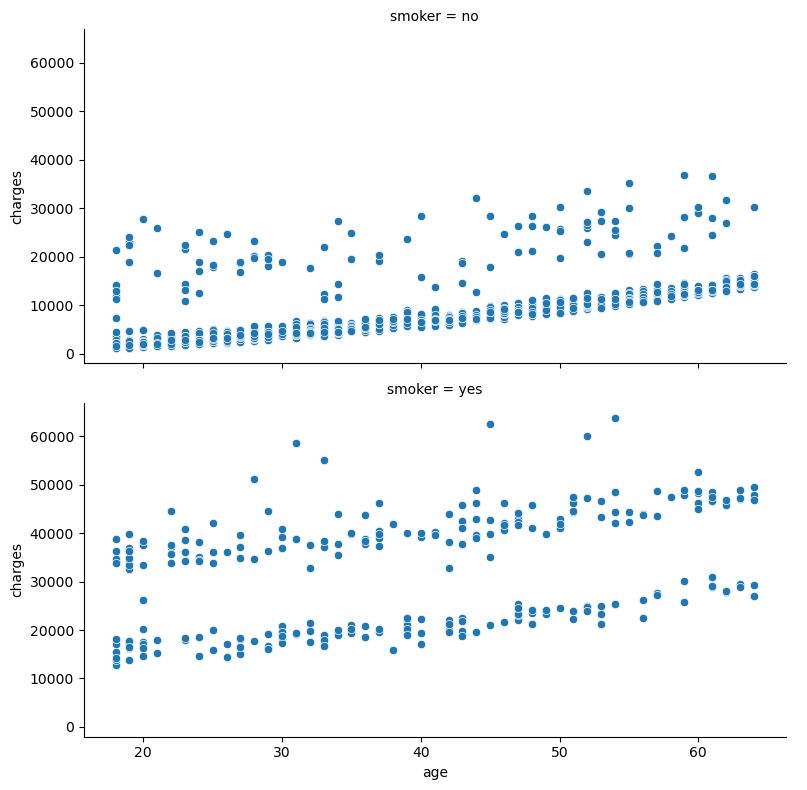

In [73]:
plt.figure(figsize=(25, 10))
g = sns.FacetGrid(data, row='smoker', height=4, aspect=2)
g.map(sns.scatterplot, 'age', 'charges').add_legend()
plt.show()

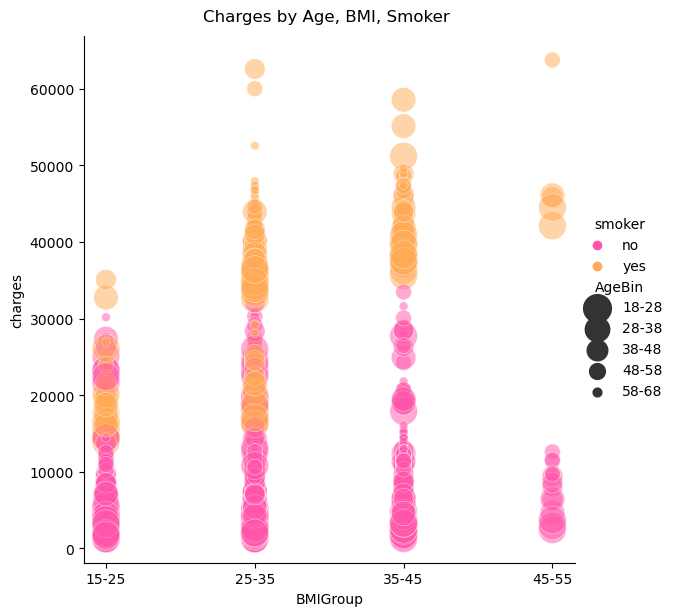

In [76]:
# Create the relplot
g = sns.relplot(x='BMIGroup', y='charges', hue='smoker', size='AgeBin',
                sizes=(40, 400), alpha=.5, palette='spring',
                height=6, data=data)
# Set the title using fig.suptitle
g.fig.suptitle('Charges by Age, BMI, Smoker', y=1.02)
plt.show()

Conclusion:

1.As the age of the beneficiary increases ,the cost to insurance increases.

2.Males who smoke have higher bills.

3.Female who are nonsmoker also have more claims to nonsmoker males this may be because of child birth , need to explore claims type to understand better.

4.Customer with bmi >30 are on higher side of obesity, have more health issues and have higher claims.

5.Females with BMI more than 45 have billed higher to insurance.

6.Age, BMI and Smoking are important attributes which can cost insurance company more.